
# step 1_1: reading data

In [1]:
import pandas as pd

In [2]:
input_data0=pd.read_csv('hour.csv')
input_data0.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# step 1_2:Cleaning data

In [3]:
input_data = input_data0.drop(['dteday'], axis=1)

In [4]:
input_data.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# step 1_3:Saved cleaned data

In [5]:
input_data.to_csv('cleaned_hour.csv')

In [6]:
input_data=pd.read_csv('cleaned_hour.csv')
input_data.head()

,Unnamed: 0,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# step 2: Features selection

In [7]:
input_data = input_data.drop(['Unnamed: 0'], axis =1)
print(input_data.columns,input_data.shape)

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object') (17379, 16)


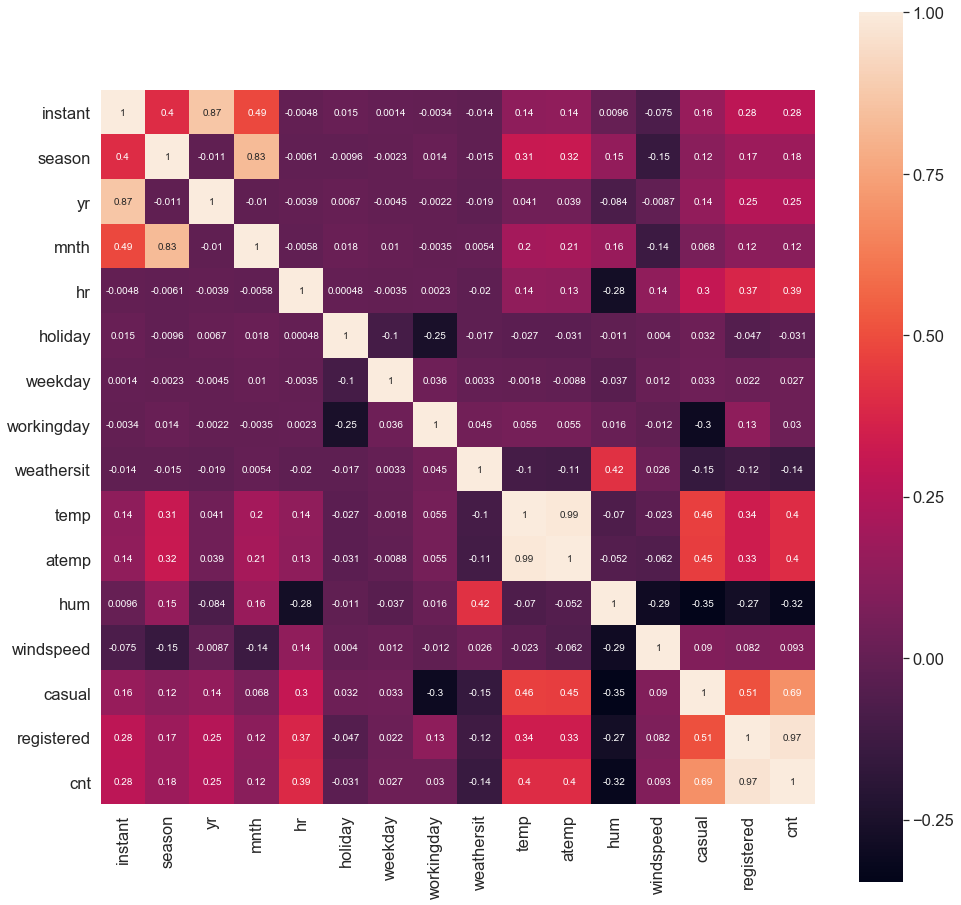

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.subplots(figsize = (16,16)) # (figsize = (18,18) size of the matrix
sns.set(font_scale=1.5)
sns.heatmap(input_data.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
#size correlaton eg1,-0.99
plt.show()

In [14]:
selected_input_data = input_data[['registered','cnt']]

In [ ]:
# selected_input_data.columns = ['economy','family','health_expect','happy']

In [15]:
selected_input_data.head()

,registered,cnt
0,13,16
1,32,40
2,27,32
3,10,13
4,1,1


# Step 3: Split data to train and test

In [16]:
from sklearn.model_selection import train_test_split
selected_input_data_train, selected_input_data_test= train_test_split(selected_input_data, test_size=0.20, random_state=31)

In [17]:
selected_input_data_train.head()

,registered,cnt
2953,89,119
9851,163,208
8518,69,97
8580,104,106
16004,371,493


In [18]:
selected_input_data_test.head()

,registered,cnt
9097,55,56
11871,178,189
2546,33,44
6198,212,253
1397,65,72


# Step 3_1: Split train and test data to features and outcome

In [19]:
selected_input_data_train_features =selected_input_data_train.drop(['cnt'], axis=1)
selected_input_data_train_features.head()
selected_input_data_train_output = selected_input_data_train['cnt']
selected_input_data_train_output.head()

2953     119
9851     208
8518      97
8580     106
16004    493
Name: cnt, dtype: int64

In [20]:
selected_input_data_test_features =selected_input_data_test.drop(['cnt'], axis=1)
selected_input_data_test_features.head()
selected_input_data_test_output = selected_input_data_test['cnt']
selected_input_data_test_output.head()

9097      56
11871    189
2546      44
6198     253
1397      72
Name: cnt, dtype: int64

# Step 4: Define a model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
My_model = LinearRegression()

# Step 5: Train the model

In [23]:
My_model.fit(selected_input_data_train_features,selected_input_data_train_output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Step 6: Do the prediction on test data

In [24]:
y_pred = My_model.predict(selected_input_data_test_features)

In [25]:
y_pred

array([ 74.277958  , 217.33550752,  48.69042882, ..., 112.65925177,
       266.18442686, 140.57291997])

# Step 7: Measure the accuracy

In [26]:
from sklearn.metrics import mean_squared_error
print ('mean_squared_error= ', mean_squared_error(selected_input_data_test_output,y_pred))

mean_squared_error=  1892.8824387230636


In [27]:
from sklearn.metrics import r2_score
print ('r2_score= ', r2_score(selected_input_data_test_output,y_pred))

r2_score=  0.9422989111010376


In [ ]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.scatter(x_val[:,1], Y_val,  color='grey')
plt.plot(x_val[:,1], diabetes_y_pred, color='red', linewidth=3)


In [ ]:
print(selected_input_data_test_output)

In [30]:
print(selected_input_data_test_features)

       registered
9097           55
11871         178
2546           33
6198          212
1397           65
5968           24
5546           29
2080           92
16856           4
5887          212
12620          42
9622          108
12633         255
732            62
7021            5
14665          26
15581         157
7244          108
12998         240
16223         575
15820         347
2880           80
2109          110
1301           79
10829          88
5296          146
13082          62
4405          112
8451           75
10474         400
...           ...
9553           21
3408          157
11219         320
9655            2
6577          157
225            70
10341          20
16431          94
13188         202
8121           55
5846            2
15868         206
9633           77
13453         684
16315         346
2903          141
9420           72
15971           8
6051          512
1700           65
11491          36
13226         489
13788         775
9568      

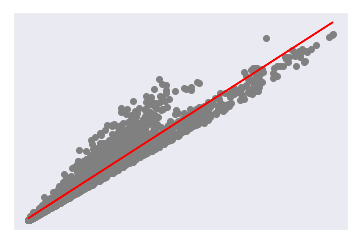

In [31]:
plt.scatter(selected_input_data_test_features,selected_input_data_test_output,color='grey')
plt.plot(selected_input_data_test_features,y_pred, color='red')
plt.xticks(())
plt.yticks(())

plt.show()